In [1]:
import numpy
import math
from PIL import Image
import matplotlib.pyplot as plt
import sys

In [2]:
color = 255
address = "./landc/"
post = ".png"
noise_range = int(3)

In [3]:
def point_dist(x1,y1,x2,y2):
    deltx = int(abs(x1-x2))
    delty = int(abs(y1-y2))
    return math.sqrt(deltx*deltx + delty*delty)

In [4]:
def cir_gener(r,res_arr,g,diag):
    arr = numpy.zeros((2*r+1,2*r+1))
    cr,cc = r,r #Relative center
    for row in range(0,2*r+1):
        for col in range(0,2*r+1):
            arr[row][col] = point_dist(row,col,cr,cc)
    arr = numpy.abs((arr-r)*1000)
    arr = arr.astype(int)
    minrv = arr.min(axis=1)
    mincv = arr.min(axis=0) #min value calculate
    res_rows,res_cols = res_arr.shape
    rcr,rcc = int(res_rows/2),int(res_cols/2) #True center of the large matrix
    if(diag):
        diag_arr = diag_points(rcr)
        #print(diag_arr)
    for row in range(0,res_rows):
        for col in range(0,res_cols):
            if(not diag and (col > rcc and abs(row-rcr) <= g/2)): #leave gap
                continue
            elif(abs(row - rcr) <= r and abs(col-rcc) <= r):
                if(arr[row-rcr+r][col-rcc+r] == minrv[row-rcr+r]):
                    if(diag and (row < rcr and col > rcc) and point_diag_cal(row,col,diag_arr,g/2)):
                        continue
                    res_arr[row][col] = color
                if(arr[row-rcr+r][col-rcc+r] == mincv[col-rcc+r]):
                    if(diag and (row < rcr and col > rcc) and point_diag_cal(row,col,diag_arr,g/2)):
                        continue
                    res_arr[row][col] = color

In [5]:
def diag_points(center):
    diag_arr = numpy.zeros((center+1,2))
    row,col = center,center
    for i in range(0,center+1):
        diag_arr[i][0] = row
        diag_arr[i][1] = col
        row -= 1
        col += 1
    return diag_arr

In [6]:
def point_diag_cal(x,y,diag_arr,dist):
    size = diag_arr.shape[0]
    minv = int(diag_arr[0][0] * 2 + 1)
    for i in range(0,size):
        temp = point_dist(x,y,diag_arr[i][0],diag_arr[i][1])
        if(minv > temp):
            minv = temp
        else:
            break
    return minv <= dist
    

In [7]:
arr = diag_points(2)
jud = point_diag_cal(0,2,arr,1)
print(arr)
print(jud)

[[2. 2.]
 [1. 3.]
 [0. 4.]]
False


In [8]:
def landc_draw(r,diag):
    d = 2*r+1
    w = int(d/5)
    g = int(d/5)
    hw = int(w/2)
    print(d,w,g)
    res_arr = numpy.zeros((2*(hw+r)+1,2*(hw+r)+1),dtype = (numpy.uint8))
    for i in range(-hw,hw+1):
        cir_gener(r+i,res_arr,g,diag)
    de_noise(res_arr)
    plt.imshow(res_arr)
    plt.show()
    return res_arr

In [9]:
def de_noise(res_arr):
    rows,cols = res_arr.shape
    for r in range(0,rows):
        for c in range(0,cols):
            if(noise_check(res_arr,r,c,noise_range)):
                res_arr[r][c] = color

In [10]:
def noise_check(res_arr,r,c,count):
    rows,cols = res_arr.shape
    cou = 0
    if(r == 0 or c == 0 or r == rows-1 or c == cols-1):
        return False
    if(res_arr[r][c] == 0):
        if(res_arr[r-1][c] != 0):
            cou += 1
        if(res_arr[r+1][c] != 0):
            cou += 1
        if(res_arr[r][c-1] != 0):
            cou += 1
        if(res_arr[r][c+1] != 0):
            cou += 1
        return (cou >= count)
    return False

In [11]:
def land_draw_g(g,diag):
    r = (g*5-1)/2
    return landc_draw(int(r),diag)

In [12]:
def save_image(res_arr,g):
    image = Image.fromarray(res_arr,mode = "L")
    image.save(address+str(g)+post)

for i in range(1,30,2):
    res_arr = land_draw_g(i)
    save_image(res_arr,i)

res_arr = land_draw_g(37)
save_image(res_arr,37)
res_arr = land_draw_g(45)
save_image(res_arr,45)
res_arr = land_draw_g(57)
save_image(res_arr,57)
res_arr = land_draw_g(73)
save_image(res_arr,73)
res_arr = land_draw_g(91)
save_image(res_arr,91)

5 1 1


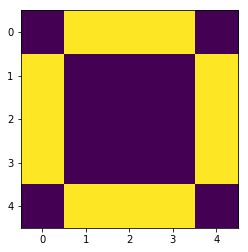

15 3 3


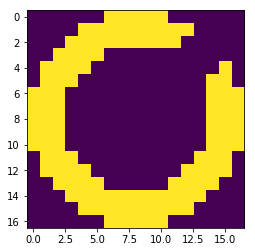

25 5 5


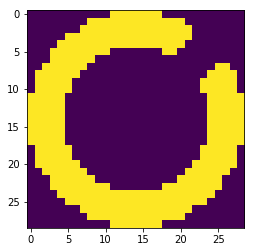

35 7 7


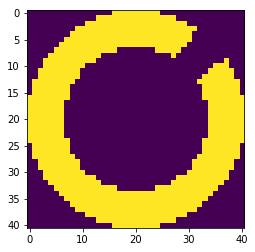

45 9 9


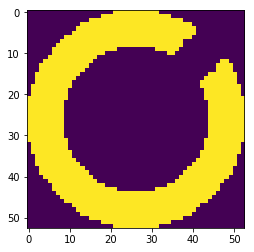

55 11 11


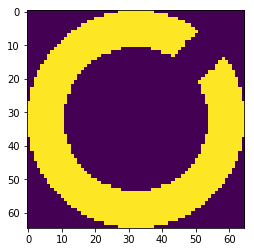

65 13 13


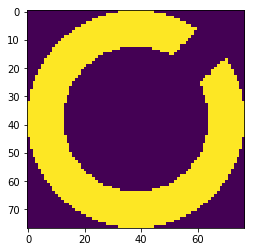

75 15 15


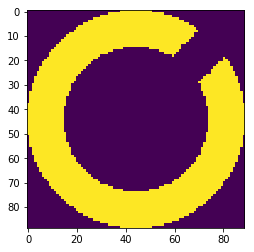

85 17 17


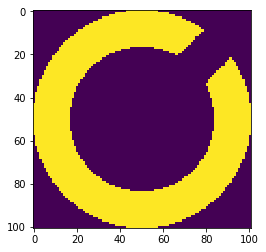

95 19 19


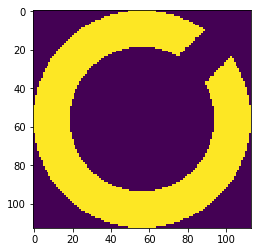

105 21 21


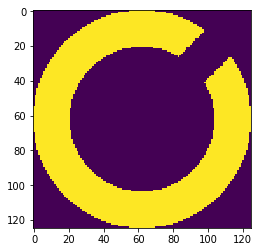

115 23 23


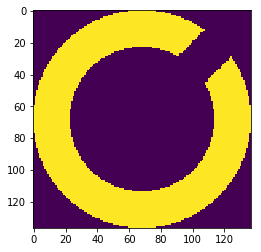

125 25 25


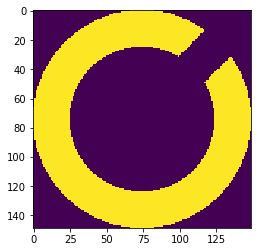

135 27 27


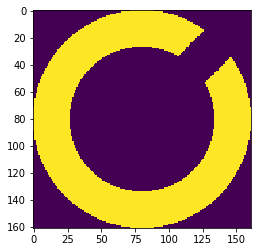

145 29 29


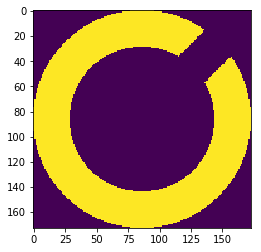

In [13]:
for i in range(1,30,2): 
    res_arr = land_draw_g(i,True)
    save_image(res_arr,i+100)